# Pymaceuticals Inc.
---

### Analysis
* According to Summary statistics, Ramicane and Capomuline drug regimens are the most efficient as they have:
    - the minimum average tumor volume among other regimens: Ramicane: 40.216745, Capomuline: 40.675741
    - the minimum standart deviation: Ramicane: 4.846308; Capomuline: 4.994774
* Bar Chart also shows that for Ramicane and Capomuline drug regimens the total number of mice tested were significant (over 200 mice), which makes summary statistics more reliable
* Line plot of tumor volume vs. time point for a mouse treated with Capomulin shows that Capomulin is effective drug as the tumor volume is reducing with time (Tested on different mice)  


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, on = "Mouse ID")

# Display the data table for preview
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


### Clean Data
- Get duplicate Mice by Mouse Id and Timepoint
- Delete duplicated mice
- Check the number of mice 

In [3]:
# Checking the number of mice
len(mouse_study["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice that shows up for Mouse ID and Timepoint. 
mice_duplicates = mouse_study.loc[mouse_study.duplicated(subset = ["Mouse ID", "Timepoint"])]
mice_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
check = mouse_study.loc[mouse_study["Mouse ID"]=='g989']
check

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = mouse_study.drop(mouse_study.loc[mouse_study["Mouse ID"]=="g989"].index)
clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean["Mouse ID"].unique())

248

### Summary Statistics
- Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
- Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    - mean, median, variance, standard deviation, and SEM of the tumor volume. 
- Assemble the resulting series into a single summary dataframe.

In [8]:
# Create DataFrame specificaly for Drug Regimen and Tumor Volume
drug_tumor = clean.loc[:,["Drug Regimen","Tumor Volume (mm3)"]]

# Group by Drug Regimen to apply different statistics to Tumor Volume categorized by Drug Regimen
grouped = drug_tumor.groupby("Drug Regimen")["Tumor Volume (mm3)"]

# Calculate statistics
mean = grouped.mean()
median = grouped.median()
variance = grouped.var()
stddev = grouped.std()
stderr = grouped.sem()

# Save statistics to separate DataFrame
summary_stat = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": stddev,
    "Tumor Volume Std. Err.": stderr
})
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
agg = drug_tumor.groupby("Drug Regimen").aggregate(["mean", "median", "var", "std", "sem"])
agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

### Bar Chart
- Generate a bar plot showing the total number of mice tested on each drug regimen using pandas.

Text(0, 0.5, 'Number of Total Mice Tested')

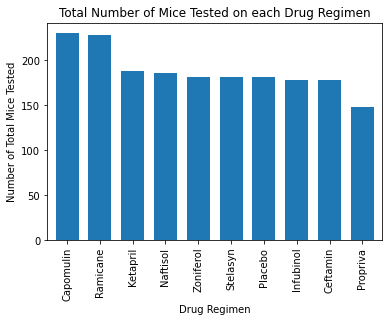

In [10]:
# Get the data - mice group by drug regimen, sort values in a Descdending mode
mice_regimen = clean.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending = False)

# Generate chart using pandas
chart = mice_regimen.plot(kind = "bar", width = 0.7, figsize=(6,4),
                          title = "Total Number of Mice Tested on each Drug Regimen")
chart.set_xlim()
chart.set_ylabel("Number of Total Mice Tested")

- Generate a bar plot showing the total number of mice tested on each drug regimen using pyplot.

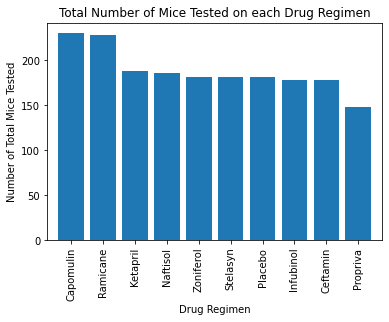

In [11]:
# set x axis and tick locations
x_axis = np.arange(len(mice_regimen))
tick_locations = [x for x in x_axis]

# Set Bar Chart parameters
plt.bar(x_axis, mice_regimen)
plt.xticks(tick_locations, mice_regimen.index.values, rotation=90)
plt.title("Total Number of Mice Tested on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Total Mice Tested")
plt.xlim(-0.75, len(x_axis)-0.25)

plt.show()

### Pie Chart
- Generate a pie plot showing the distribution of female versus male mice using pandas

<AxesSubplot:ylabel='Sex'>

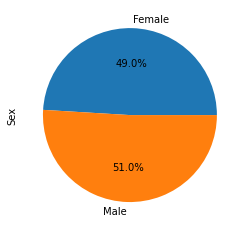

In [12]:
# Get mice sex data, count number of mice in each sex
sex = clean.groupby("Sex")["Sex"].count()

# Set parameters for pie chart
pie_series = pd.Series(sex, index=sex.index.values, name="Sex")

pie_series.plot(kind = "pie", autopct="%1.1f%%")

- Generate a pie plot showing the distribution of female versus male mice using pyplot

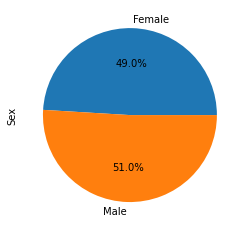

In [13]:
# Set Pie Plot parameters
plt.pie(sex, labels=sex.index.values, autopct="%1.1f%%")
plt.ylabel("Sex", rotation = 90)

plt.show()

### Quartiles, Outliers and Boxplots
- Calculate the final tumor volume of each mouse across four of the treatment regimens:  
    - Capomulin, Ramicane, Infubinol, and Ceftamin

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Get the last (greatest) volume for each mouse,
# initial data is saved for each mouse with timestamps in ascendig order, use pandas method last
final_tumor = clean.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"].last()

# Create empty list to fill with tumor vol data
tumor_vol_list = []
# Create list to fill with potential outliers for each drug regimen
outliers = []

# Quantitatively determine if there are any potential outliers.
# Calculate Quartiles, IQR, outlier boundaries for each of four drug regimen
for drug in treatment_list:
    
    # Calculate tumor volume for each drug regimen
    tumor_volume = clean.loc[clean["Drug Regimen"] == drug].groupby(
    "Mouse ID")["Tumor Volume (mm3)"].last()
    
    # Calculate quartiles to define IQR and lower and upper bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    # Define IQR, lower and upper bounds   
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Add Dictionary item for each drug regimen {drug_name: [tumor_volums]} to the tumor_vol_list 
    tumor_vol_list.append({drug:tumor_volume})

    # Determine outliers for each drug regimen and add to the outliers list
    for size in tumor_volume:
        if (size<lower_bound)|(size>upper_bound):
            outliers.append({drug:size})
            
# Print potential outliers
for val in outliers:
    print(f"Potential Outliers: {val}")

Potential Outliers: {'Infubinol': 36.321345799999996}


### Box Plot
- Generate a box plot of the final tumor volume of each mouse across four regimens of interest

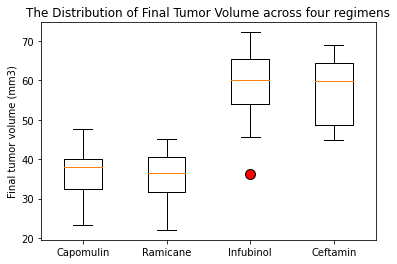

In [15]:
# Create data list that contains last tumor volumes for each drug regimen for Box plot
data = [tumor_vol_list[x][treatment_list[x]] for x in range(0, len(treatment_list))]

# Configure Box Plot
plt.boxplot(data, labels = treatment_list, flierprops=dict(markerfacecolor="r", markersize=10))
plt.title("The Distribution of Final Tumor Volume across four regimens")
plt.ylabel("Final tumor volume (mm3)")

plt.show()

### Line and Scatter Plots
- Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
- Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

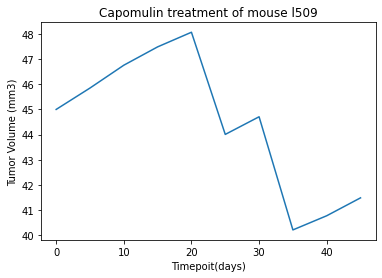

In [18]:
# mouse = input("Choose mouse to see the progress of Capomulin treatment ")
mouse = "l509"

# Select data about specific mouse treatment via Capomulin
capomulin_mouse = clean.loc[(clean["Mouse ID"] == mouse)&(clean["Drug Regimen"] == "Capomulin")]

# Configure Line Plot
plt.plot(capomulin_mouse.Timepoint, capomulin_mouse["Tumor Volume (mm3)"])
plt.title(f"Capomulin treatment of mouse {mouse}")
plt.xlabel("Timepoit(days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

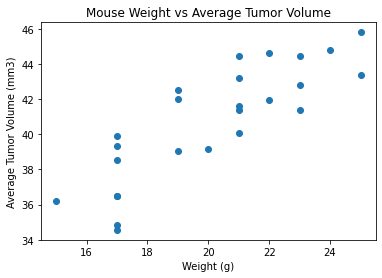

In [19]:
# Get weight and average tumor volume data for each mouse from initial data set for Capomulin drug regimen
capomulin_mice = clean[["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]].loc[
    clean["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()

weights = capomulin_mice["Weight (g)"]
volumes = capomulin_mice["Tumor Volume (mm3)"]

# Generate scatter plot
plt.scatter(weights, volumes)
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

### Correlation and Regression
- Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

The correlation between mouse weight and the average tumor volume is 0.84


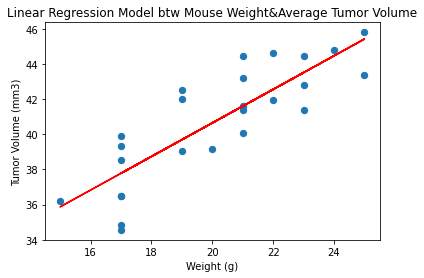

In [20]:
# Calculate correlation usong scipy pearsonr method
correlation = st.pearsonr(weights, volumes)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Calculate linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(weights, volumes)
regress_values = weights * slope + intercept

# Generate Scatter plot with linear regression
scatter_plot = capomulin_mice.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)", s=40)
scatter_plot.set_title("Linear Regression Model btw Mouse Weight&Average Tumor Volume")
plt.plot(weights,regress_values,"r-")
plt.show()